### Dataset URL
https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import squarify as sq

In [79]:
retail_dataset = pd.read_excel("./datasets/Online Retail.xlsx")

retail_dataset.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [80]:
retail_dataset.shape

(541909, 8)

In [81]:
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [82]:
retail_dataset = retail_dataset.drop(["StockCode", "CustomerID"], axis = 1)

retail_dataset.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [83]:
retail_dataset["Description"] = retail_dataset["Description"].str.strip()

retail_dataset.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [84]:
retail_dataset.isnull().sum()

InvoiceNo         0
Description    1455
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [85]:
retail_dataset.dropna(inplace = True)

retail_dataset.shape

(540454, 6)

https://stackoverflow.com/questions/51182182/pandas-delete-row-if-cell-contains-specific-text
<br>
https://stackoverflow.com/questions/52297740/typeerror-bad-operand-type-for-unary-float

As credit types have "quantity in negative" which means like the item which where were returned by the customer for the simplicity we will remove the credit type of transaction.

In [86]:
(retail_dataset["InvoiceNo"].str.contains("C")).value_counts()

True     9288
False       3
Name: InvoiceNo, dtype: int64

In [87]:
retail_dataset["InvoiceNo"] = retail_dataset["InvoiceNo"].astype(str)

retail_dataset = retail_dataset[~retail_dataset["InvoiceNo"].str.contains("C")]

retail_dataset.shape

(531166, 6)

In [88]:
retail_dataset_duplicates = retail_dataset[retail_dataset.duplicated()]

retail_dataset_duplicates

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country
517,536409,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,United Kingdom
527,536409,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,United Kingdom
537,536409,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,United Kingdom
539,536409,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,United Kingdom
555,536412,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,United Kingdom
...,...,...,...,...,...,...
541675,581538,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,United Kingdom
541689,581538,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,United Kingdom
541692,581538,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,United Kingdom
541699,581538,WICKER STAR,1,2011-12-09 11:34:00,2.10,United Kingdom


In [89]:
retail_dataset = retail_dataset.drop(retail_dataset_duplicates.index)

retail_dataset.shape

(525856, 6)

https://www.geeksforgeeks.org/python-pandas-dataframe-astype/
<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
<br>
https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

Removing postage in rows because makes no sense as it is the amount taken for sending the item like shipment of the product

In [90]:
postage = retail_dataset["Description"] == "POSTAGE"

postage.value_counts()

False    524730
True       1126
Name: Description, dtype: int64

In [91]:
retail_dataset = retail_dataset.drop(retail_dataset[postage].index)

retail_dataset.shape

(524730, 6)

In [92]:
(retail_dataset["Country"]).value_counts()

United Kingdom          480895
Germany                   8653
France                    8093
EIRE                      7883
Spain                     2418
Netherlands               2326
Belgium                   1935
Switzerland               1928
Portugal                  1462
Australia                 1183
Norway                    1052
Channel Islands            747
Italy                      741
Finland                    648
Cyprus                     601
Unspecified                442
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     291
Hong Kong                  278
Singapore                  222
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
RSA                         58
European Community          57
Lebanon 

In [93]:
country_list = ["Germany", "France", "Spain","Netherlands", "Belgium"]

retail_dataset = retail_dataset.loc[retail_dataset["Country"].isin(country_list)]\
                               .reset_index().drop('index', axis=1)

retail_dataset.shape

(23425, 6)

In [94]:
retail_dataset["TotalPrice"] = retail_dataset["Quantity"] * retail_dataset["UnitPrice"]

retail_dataset.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice
0,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,France,90.0
1,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,France,90.0
2,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,France,45.0
3,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,France,10.2
4,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,France,15.6


### We are using these columns for the analysis purpose

In [95]:
retail_dataset["Year"] = retail_dataset["InvoiceDate"].dt.year

retail_dataset["Month"] = retail_dataset["InvoiceDate"].dt.month

retail_dataset["Hour"] = retail_dataset["InvoiceDate"].dt.hour

retail_dataset["DayOfWeek"] = retail_dataset["InvoiceDate"].dt.dayofweek

retail_dataset["DayName"] = retail_dataset["InvoiceDate"].dt.day_name()

In [96]:
retail_dataset.sample(5)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalPrice,Year,Month,Hour,DayOfWeek,DayName
19957,575049,SPACEBOY CHILDRENS BOWL,8,2011-11-08 12:13:00,1.25,France,10.0,2011,11,12,1,Tuesday
810,539446,ROUND SNACK BOXES SET OF 4 FRUITS,6,2010-12-17 15:58:00,2.95,Germany,17.7,2010,12,15,4,Friday
14966,566557,HAND WARMER OWL DESIGN,96,2011-09-13 11:47:00,1.85,Netherlands,177.6,2011,9,11,1,Tuesday
1127,539957,BIRTHDAY BANQUET GIFT WRAP,25,2010-12-23 12:58:00,0.42,Germany,10.5,2010,12,12,3,Thursday
8415,554861,ROUND CONTAINER SET OF 5 RETROSPOT,12,2011-05-27 10:29:00,1.65,Germany,19.8,2011,5,10,4,Friday


In [97]:
day_names = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

retail_dataset["DayName"] = pd.Categorical(retail_dataset['DayName'], 
                                           categories = day_names, 
                                           ordered = True)

Text(0, 0.5, 'Total Sales')

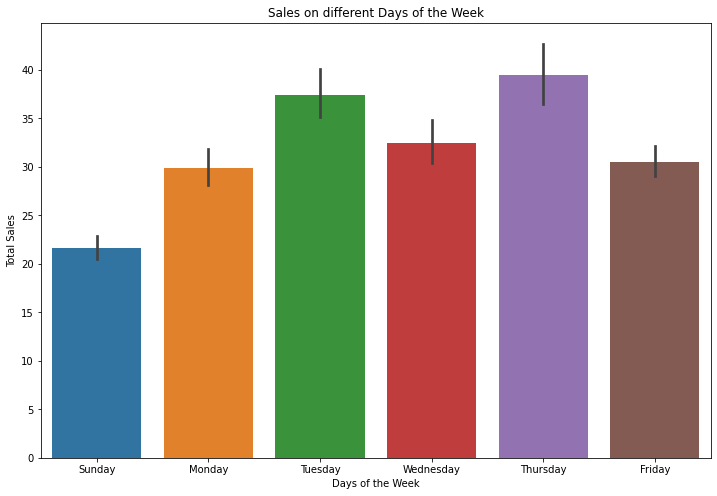

In [100]:
plt.figure(figsize = (12, 8))

sns.barplot(x = "DayName", y = "TotalPrice", data = retail_dataset)

plt.title("Sales on different Days of the Week")

plt.xlabel("Days of the Week")
plt.ylabel("Total Sales")

In [101]:
pivot_retail_dataset = retail_dataset.pivot_table(index = "Month",
                                                  columns = "DayName",
                                                  values = "TotalPrice",
                                                  aggfunc='mean')

pivot_retail_dataset

DayName,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
Month,,,,,,
1,26.025000,24.766365,46.299746,40.338789,22.085097,38.347284
2,23.150000,74.194207,45.645154,18.233016,22.741106,25.395356
3,19.602969,18.164542,57.338449,27.440779,37.088345,27.024802
4,18.649273,20.037667,44.058643,30.422222,22.354359,23.642424
5,18.302639,21.383593,22.520855,34.793415,71.900937,24.977168
6,40.425342,18.821746,73.415069,38.850478,16.218297,31.145503
7,17.645641,32.434065,16.347103,19.859714,28.868000,18.439963
8,12.416514,24.139852,45.434715,29.926565,52.648891,39.625314
9,17.497778,60.180836,54.367273,18.050346,26.593925,23.590600


https://seaborn.pydata.org/generated/seaborn.heatmap.html

Text(87.0, 0.5, 'Months represented')

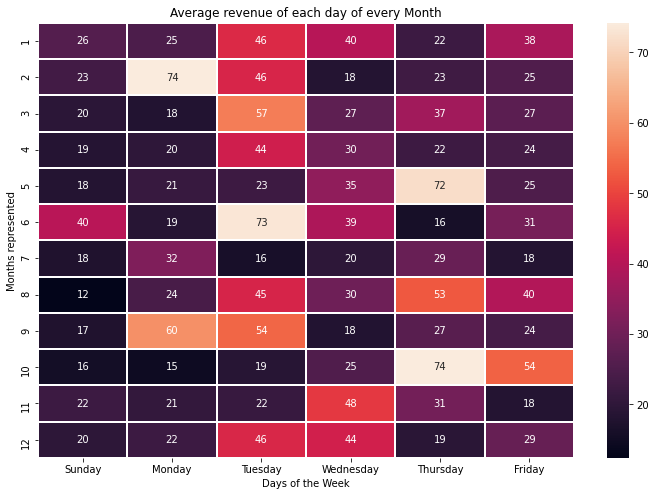

In [102]:
plt.figure(figsize = [12, 8])

sns.heatmap(pivot_retail_dataset, linewidths = 1, annot = True)

plt.title("Average revenue of each day of every Month")

plt.xlabel("Days of the Week")

plt.ylabel("Months represented")

Text(0, 0.5, 'Frequency')

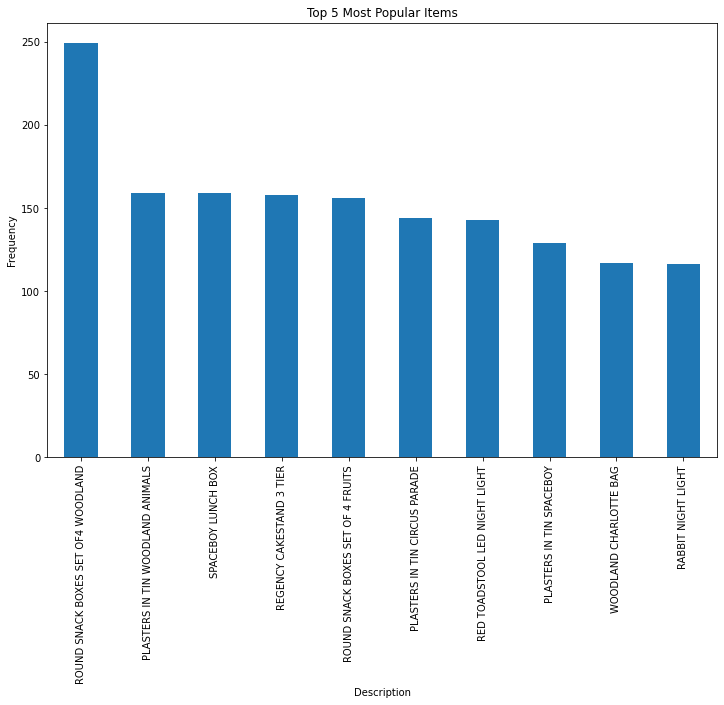

In [111]:
fig, ax = plt.subplots(figsize = (12,8))

retail_dataset["Description"].value_counts().sort_values(ascending = False).head(10).plot.bar()

plt.title("Top 5 Most Popular Items")

plt.xlabel("Description")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Top 5 Most Popular Items')

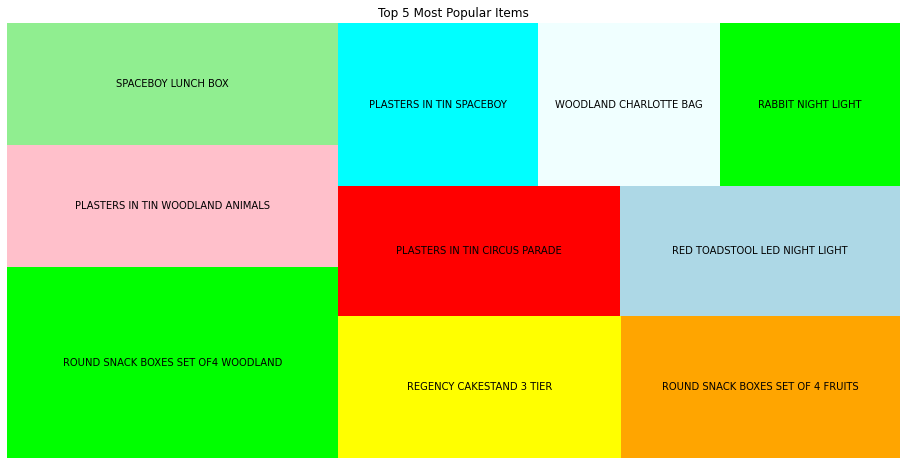

In [118]:
plt.figure(figsize = (16, 8))

x = retail_dataset["Description"].value_counts().sort_values(ascending = False).head(10)

color = ["lime" ,"pink", "lightgreen", "yellow", "orange", "red", "lightblue", "cyan", "azure"]

sq.plot(sizes = x, label = x.index, color = color).axis('off')

plt.title("Top 5 Most Popular Items")

In [119]:
retail_dataset = retail_dataset.drop(["Quantity",
                                      "InvoiceDate", "UnitPrice", \
                                      "Country", "TotalPrice", \
                                      "Year", "Month", "Hour", \
                                      "DayOfWeek", "DayName"], axis = 1)

retail_dataset.head()

,InvoiceNo,Description
0,536370,ALARM CLOCK BAKELIKE PINK
1,536370,ALARM CLOCK BAKELIKE RED
2,536370,ALARM CLOCK BAKELIKE GREEN
3,536370,PANDA AND BUNNIES STICKER SHEET
4,536370,STARS GIFT TAPE


### Grouping the retail data based on InvoiceNo and seperating the rest with commas

In [121]:
items_per_transaction = retail_dataset.groupby("InvoiceNo").agg(",".join).reset_index()

items_per_transaction.head()

,InvoiceNo,Description
0,536370,"ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE..."
1,536403,HAND WARMER BIRD DESIGN
2,536527,"SET OF 6 T-LIGHTS SANTA,ROTATING SILVER ANGELS..."
3,536840,"JAM MAKING SET PRINTED,JAM JAR WITH PINK LID,J..."
4,536852,"PICTURE DOMINOES,MINI JIGSAW SPACEBOY,MINI JIG..."


In [122]:
items_per_transaction.to_csv("./datasets/Items_per_Transaction.csv", index = False)